##### venv/bin/jupyter notebook (to use in command line)

In [1]:
import turicreate as tc

In [2]:
data = tc.image_analysis.load_images('Data_smile_yes_no', with_path= True)

In [3]:
data['label'] = data['path'].apply(lambda path: 'No_Smile' if '/Smile_No' in path else 'Yes_Smile')

In [4]:
data.save('Smile-yesno.sframe') # saving data to sframe

/home/shivalika/Desktop/ds_turicreate/venv/lib/python3.6/site-packages/turicreate/visualization/_plot.py:376: UserWarning: Displaying only the first 100 rows.
  warnings.warn('Displaying only the first {} rows.'.format(maximum_rows))


,path,image,label
0,Data_smile_yes_no/Data_smile_yes_no/Smile_No/100a.jpg,,No_Smile
1,Data_smile_yes_no/Data_smile_yes_no/Smile_No/101a.jpg,,No_Smile
2,Data_smile_yes_no/Data_smile_yes_no/Smile_No/102a.jpg,,No_Smile
3,Data_smile_yes_no/Data_smile_yes_no/Smile_No/103a.jpg,,No_Smile
4,Data_smile_yes_no/Data_smile_yes_no/Smile_No/104a.jpg,,No_Smile
5,Data_smile_yes_no/Data_smile_yes_no/Smile_No/105a.jpg,,No_Smile
6,Data_smile_yes_no/Data_smile_yes_no/Smile_No/106a.jpg,,No_Smile
7,Data_smile_yes_no/Data_smile_yes_no/Smile_No/107a.jpg,,No_Smile
8,Data_smile_yes_no/Data_smile_yes_no/Smile_No/108a.jpg,,No_Smile
9,Data_smile_yes_no/Data_smile_yes_no/Smile_No/109a.jpg,,No_Smile

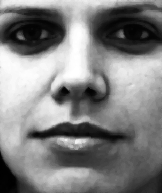
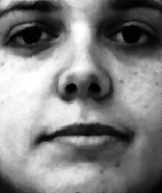
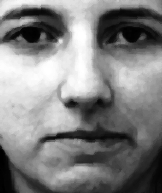
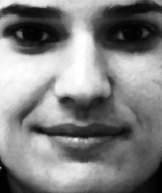
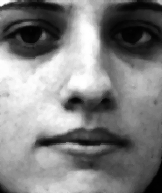
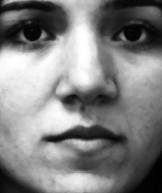
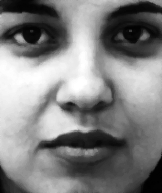
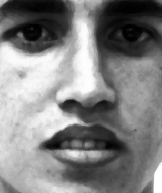
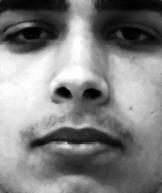
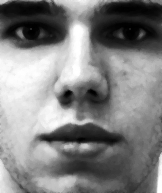
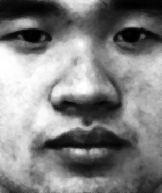
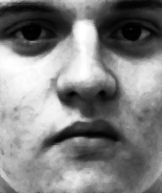
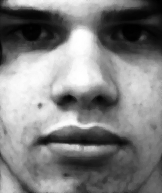
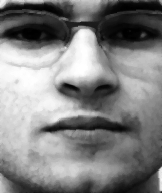
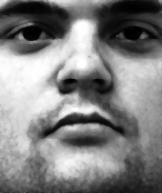
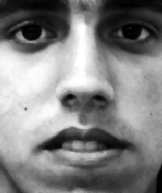
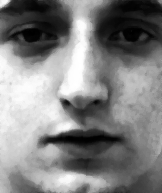
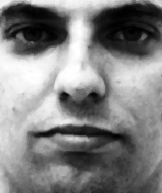
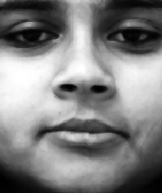
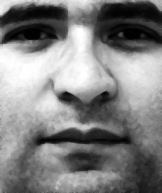
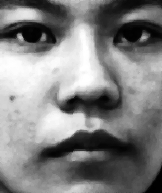
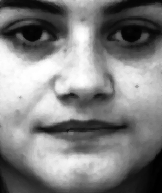
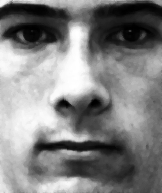
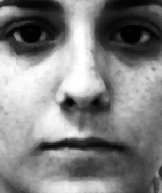
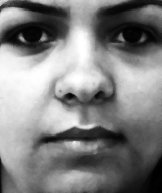
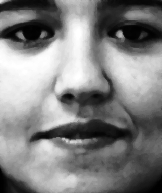
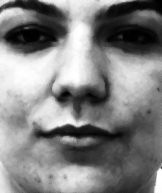
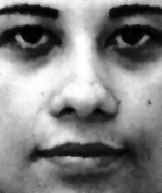
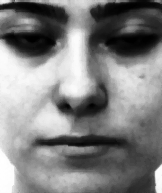
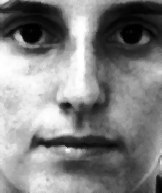
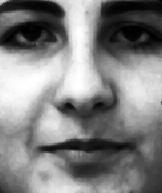
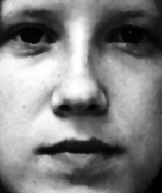
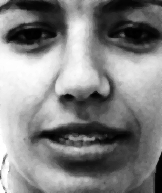
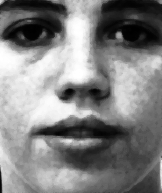
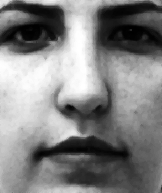
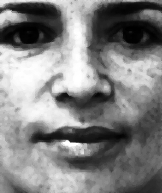
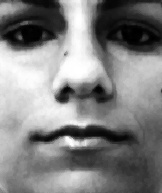
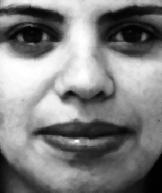
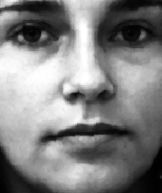
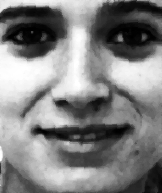
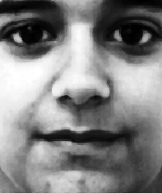
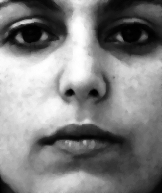
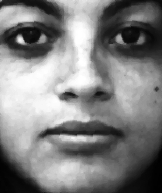
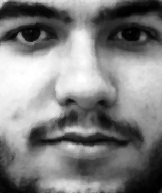
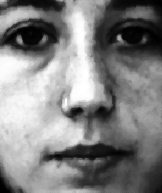
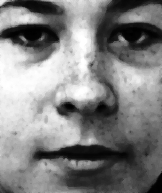
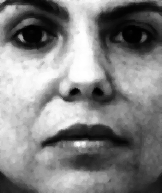
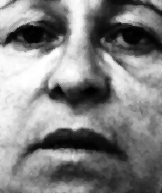
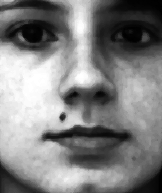
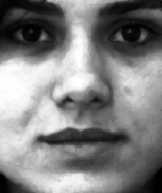
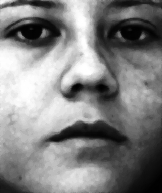
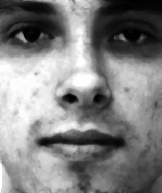
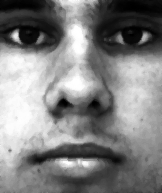
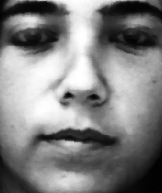
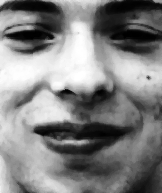
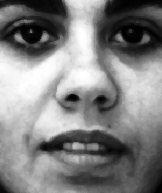
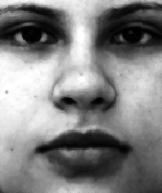
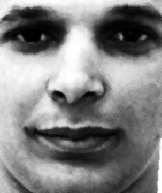
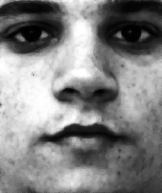
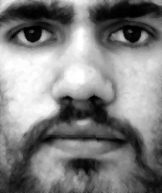
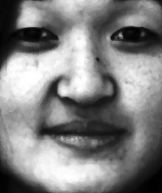
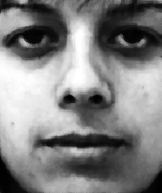
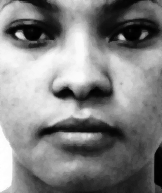
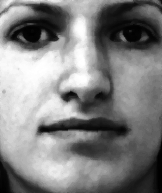
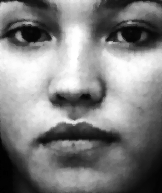
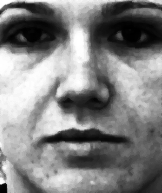
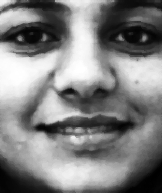
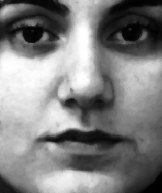
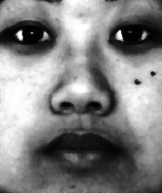
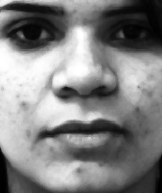
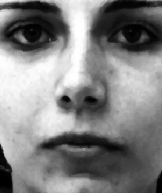
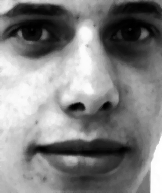
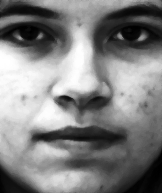
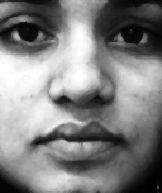
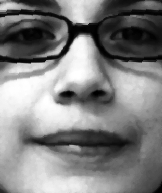
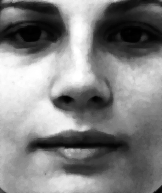
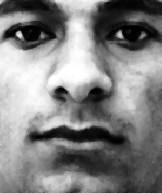
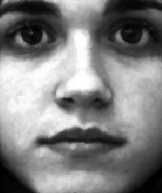
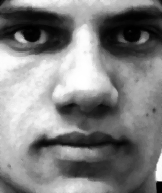
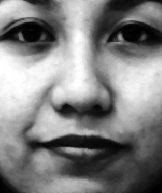
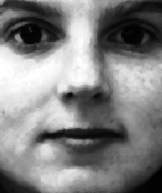
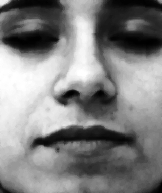
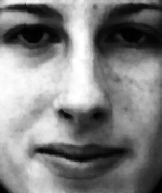
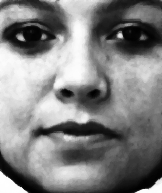
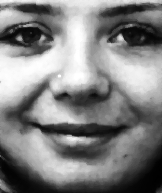
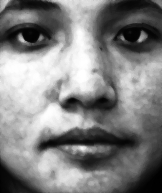
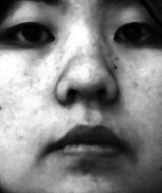
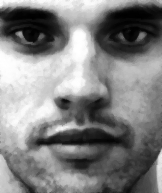
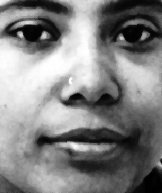
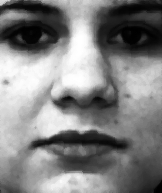
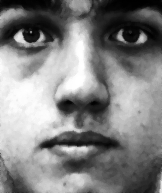
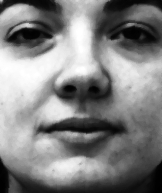
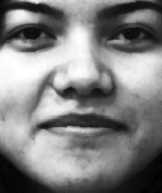
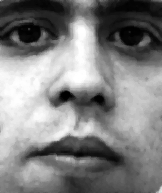
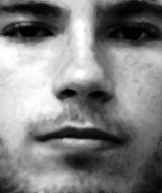
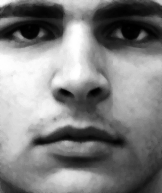
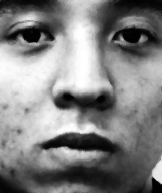
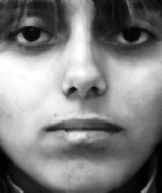
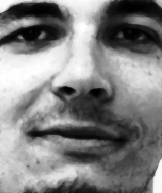
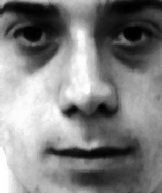

In [5]:
data.explore() #display only first rows

In [6]:
train_data, test_data = data.random_split(0.8, exact=True, seed=100)#seed= random state

#### Using Resnet-50

In [7]:
model = tc.image_classifier.create(train_data, target='label',model= 'resnet-50', validation_set=test_data)
#maximum iteration(max_iterations) is default 10 if not specified but we can further add  max_iterations to any number we want to check the best accuracy

Performing feature extraction on resized images...
Completed  64/320
Completed 128/320
Completed 192/320
Completed 256/320
Completed 320/320
Performing feature extraction on resized images...
Completed 64/80
Completed 80/80


Logistic regression:

--------------------------------------------------------

Number of examples          : 320

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.152169     | 0.837500          | 0.875000            |

| 1         | 6        | 0.250000  | 1.214514     | 0.912500          | 0.875000            |

| 2         | 7        | 0.312500  | 1.258119     | 0.912500          | 0.875000            |

| 3         | 11       | 0.937500  | 1.342892     | 0.909375          | 0.900000            |

| 4         | 13       | 0.947228  | 1.400903     | 0.928125          | 0.900000            |

| 9         | 22       | 0.923948  | 1.649891     | 1.000000          | 0.950000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [8]:
metrics = model.evaluate(test_data)
print(metrics['accuracy'])#no need to do this step as the previous step gives accuracy for each iteration

Performing feature extraction on resized images...
Completed 64/80
Completed 80/80
0.95


/home/shivalika/Desktop/ds_turicreate/venv/lib/python3.6/site-packages/turicreate/aggregate.py:92: UserWarning: Passing parameter(s) to COUNT is deprecated. This functionality will be removed in the next major release. Any passed parameters are ignored.
  + 'the next major release. Any passed parameters are ignored.')


In [9]:
model.save('mymodel_resnet.model')#saving the model for future use

In [10]:
metrics = model.evaluate(train_data)
print(metrics['accuracy'])

Performing feature extraction on resized images...
Completed  64/320
Completed 128/320
Completed 192/320
Completed 256/320
Completed 320/320
1.0


#### Using Squezzenet

In [11]:
model = tc.image_classifier.create(train_data, target='label', model='squeezenet_v1.1', validation_set=test_data)

Performing feature extraction on resized images...
Completed  64/320
Completed 128/320
Completed 192/320
Completed 256/320
Completed 320/320
Performing feature extraction on resized images...
Completed 64/80
Completed 80/80


Logistic regression:

--------------------------------------------------------

Number of examples          : 320

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 1001

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.005371  | 0.097173     | 0.518750          | 0.425000            |

Warning: Reached max step size.

| 1         | 14       | 25.000000 | 0.223702     | 0.846875          | 0.900000            |

| 2         | 18       | 6.250000  | 0.292638     | 0.875000          | 0.912500            |

| 3         | 20       | 2.748388  | 0.327499     | 0.915625          | 0.950000            |

| 4         | 21       | 2.748388  | 0.350572     | 0.896875          | 0.925000            |

| 9         | 28       | 1.542194  | 0.507489     | 0.937500          | 0.937500            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [12]:
model.save('mymodelsqueezenet.model')

In [13]:
prob = model.predict(test_data, output_type='probability')
pred = model.predict(test_data) #finding the probability of one class

In [14]:
import pandas

In [15]:
results = pandas.DataFrame({"Images":test_data["path"],"probability": prob, "prediction":pred, "real":test_data["label"]})
results["Images"] = results["Images"].apply(lambda x : x.split("/")[-1])#splitting at / and called the last elemnt to obtain the image no.
results = results.sort_values(["Images"])
results

,Images,probability,prediction,real
46,103b.jpg,0.999973,Yes_Smile,Yes_Smile
0,105a.jpg,0.002486,No_Smile,No_Smile
1,107a.jpg,0.528869,Yes_Smile,No_Smile
2,10a.jpg,0.046670,No_Smile,No_Smile
3,113a.jpg,0.002385,No_Smile,No_Smile
...,...,...,...,...
77,91b.jpg,0.935944,Yes_Smile,Yes_Smile
78,95b.jpg,0.999320,Yes_Smile,Yes_Smile
44,96a.jpg,0.000023,No_Smile,No_Smile
79,97b.jpg,0.999935,Yes_Smile,Yes_Smile
